In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('/home/neeraj/python_programs/kaggle_practice/Dataset/Train.csv')

In [3]:
test_df = pd.read_csv('/home/neeraj/python_programs/kaggle_practice/Dataset/Test.csv')

In [4]:
train_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.1+ MB


In [6]:
train_df = train_df.dropna()  #removing null values

In [7]:
train_df.shape

(23674, 18)

In [8]:
#Feature engineering on Date column
train_df['DATE'] = pd.to_datetime(train_df['DATE'])

In [9]:
train_df['month'] = train_df['DATE'].apply(lambda date:date.month)
train_df['year'] = train_df['DATE'].apply(lambda date:date.year)

In [10]:
test_df['DATE'] = pd.to_datetime(test_df['DATE'])

test_df['month'] = test_df['DATE'].apply(lambda date:date.month)
test_df['year'] = test_df['DATE'].apply(lambda date:date.year)

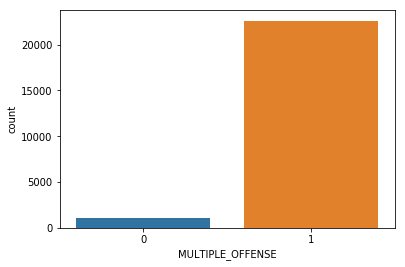

In [11]:
#EDA
sns.countplot(train_df['MULTIPLE_OFFENSE'])

In [14]:
#sampling the imbalance data
from sklearn.utils import resample
df_majority = train_df[train_df['MULTIPLE_OFFENSE']==1]
df_minority = train_df[train_df['MULTIPLE_OFFENSE']==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=20000,    
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.shape

(42606, 20)

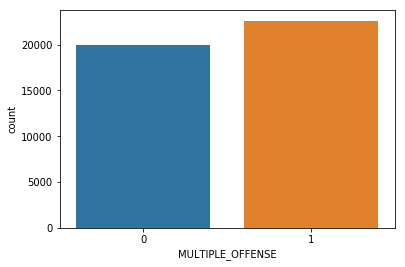

In [15]:
sns.countplot(df_upsampled['MULTIPLE_OFFENSE'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_upsampled.drop(['MULTIPLE_OFFENSE','INCIDENT_ID','DATE'],axis=1)
y = df_upsampled['MULTIPLE_OFFENSE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier()

In [21]:
rfc.fit(X_train,y_train)

/home/neeraj/miniconda2/envs/myenvironment/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
predictions = rfc.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5979
           1       1.00      0.99      1.00      6803

   micro avg       1.00      1.00      1.00     12782
   macro avg       1.00      1.00      1.00     12782
weighted avg       1.00      1.00      1.00     12782



In [25]:
print(confusion_matrix(y_test,predictions))

[[5979    0]
 [  45 6758]]


In [26]:
test_df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'month',
       'year'],
      dtype='object')

In [27]:
X_test.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'month', 'year'],
      dtype='object')

In [39]:
test_df1 = test_df.drop(['INCIDENT_ID','DATE'],axis=1)

In [40]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
X_1      15903 non-null int64
X_2      15903 non-null int64
X_3      15903 non-null int64
X_4      15903 non-null int64
X_5      15903 non-null int64
X_6      15903 non-null int64
X_7      15903 non-null int64
X_8      15903 non-null int64
X_9      15903 non-null int64
X_10     15903 non-null int64
X_11     15903 non-null int64
X_12     15776 non-null float64
X_13     15903 non-null int64
X_14     15903 non-null int64
X_15     15903 non-null int64
month    15903 non-null int64
year     15903 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.1 MB


In [42]:
test_df1[test_df1==np.inf]=np.nan
test_df1.fillna(test_df1.mean(), inplace=True)

In [43]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
X_1      15903 non-null int64
X_2      15903 non-null int64
X_3      15903 non-null int64
X_4      15903 non-null int64
X_5      15903 non-null int64
X_6      15903 non-null int64
X_7      15903 non-null int64
X_8      15903 non-null int64
X_9      15903 non-null int64
X_10     15903 non-null int64
X_11     15903 non-null int64
X_12     15903 non-null float64
X_13     15903 non-null int64
X_14     15903 non-null int64
X_15     15903 non-null int64
month    15903 non-null int64
year     15903 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.1 MB


In [44]:
final_predictions = rfc.predict(test_df1)

In [46]:
final_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
predictions_df = pd.DataFrame(final_predictions)

In [48]:
result = pd.concat((test_df['INCIDENT_ID'],predictions_df), axis=1)

In [49]:
result.columns=['INCIDENT_ID','MULTIPLE_OFFENSE']

In [50]:
result.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [51]:
# creating submission files
result.to_csv('my_submission3.csv', index=False)